In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')

# Preview the data
data.head()

/tmp/ipython-input-3775901713.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  3 of 3 completed


Price           Close                              High             \
Ticker           AAPL      GOOGL        MSFT       AAPL      GOOGL   
Date                                                                 
2020-01-02  72.538513  67.965240  152.791122  72.598892  67.965240   
2020-01-03  71.833275  67.609680  150.888596  72.594040  68.216995   
2020-01-06  72.405693  69.411766  151.278641  72.444336  69.437089   
2020-01-07  72.065155  69.277687  149.899307  72.671348  69.694316   
2020-01-08  73.224396  69.770775  152.286972  73.526287  70.108942   

Price                         Low                              Open  \
Ticker            MSFT       AAPL      GOOGL        MSFT       AAPL   
Date                                                                  
2020-01-02  152.895761  71.292304  66.863343  150.612747  71.545890   
2020-01-03  152.153771  71.608669  66.904545  150.355893  71.765651   
2020-01-06  151.345236  70.703027  67.087298  148.881465  70.954203   
2020-01-07  151.887434  71.845377  69.101405  149.651985  72.415345   
2020-01-08  152.962372  71.768071  69.154527  150.251279  71.768071   

Price                                 Volume                      
Ticker          GOOGL        MSFT       AAPL     GOOGL      MSFT  
Date                                                              
2020-01-02  66.958686  151.040810  135480400  27278000  22622100  
2020-01-03  66.938316  150.603230  146322800  23408000  21116200  
2020-01-06  67.118577  149.423690  118387200  46768000  20813700  
2020-01-07  69.543357  151.554502  108872000  34330000  21634100  
2020-01-08  69.263274  151.183509  132079200  35314000  27746500

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1258 non-null   float64
 1   (Close, GOOGL)   1258 non-null   float64
 2   (Close, MSFT)    1258 non-null   float64
 3   (High, AAPL)     1258 non-null   float64
 4   (High, GOOGL)    1258 non-null   float64
 5   (High, MSFT)     1258 non-null   float64
 6   (Low, AAPL)      1258 non-null   float64
 7   (Low, GOOGL)     1258 non-null   float64
 8   (Low, MSFT)      1258 non-null   float64
 9   (Open, AAPL)     1258 non-null   float64
 10  (Open, GOOGL)    1258 non-null   float64
 11  (Open, MSFT)     1258 non-null   float64
 12  (Volume, AAPL)   1258 non-null   int64  
 13  (Volume, GOOGL)  1258 non-null   int64  
 14  (Volume, MSFT)   1258 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 157.2 KB


In [ ]:
df.describe()

Price         Close                                   High               \
Ticker         AAPL        GOOGL         MSFT         AAPL        GOOGL   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     138.220942   107.131351   255.238727   139.704823   108.341035   
std       33.421410    24.942822    55.038634    33.541731    25.102134   
min       54.316933    52.345467   129.171265    55.316751    52.980089   
25%      120.626509    87.425516   213.717949   121.869863    88.247969   
50%      143.088570   109.135784   251.970795   144.665454   110.673177   
75%      163.506104   129.357803   294.983444   165.786477   131.177389   
max      196.446808   148.812134   377.783600   197.944126   150.508422   

Price                        Low                                   Open  \
Ticker         MSFT         AAPL        GOOGL         MSFT         AAPL   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     257.885690   136.588527   105.865217   252.348714   138.090654   
std       55.173988    33.282002    24.812722    54.810215    33.415133   
min      134.083674    51.469998    50.097967   126.405123    55.215075   
25%      215.176370   119.090675    86.353289   210.152981   120.732243   
50%      254.473854   141.423882   107.230425   248.379065   142.938067   
75%      298.883507   162.250116   128.106441   291.670799   163.774404   
max      379.363031   195.346124   147.879049   373.301915   196.357567   

Price                                   Volume                              
Ticker        GOOGL         MSFT          AAPL         GOOGL          MSFT  
count   1006.000000  1006.000000  1.006000e+03  1.006000e+03  1.006000e+03  
mean     107.063804   255.129450  9.895373e+07  3.449953e+07  3.065455e+07  
std       24.995881    55.064633  5.439610e+07  1.501422e+07  1.299770e+07  
min       52.456699   130.687931  2.404830e+07  9.312000e+06  9.200800e+06  
25%       87.499011   213.590349  6.407675e+07  2.502685e+07  2.249522e+07  
50%      109.036711   251.475591  8.467540e+07  3.071800e+07  2.727275e+07  
75%      129.857604   294.756338  1.155069e+08  3.933900e+07  3.462020e+07  
max      150.213959   378.829989  4.265100e+08  1.232000e+08  9.701270e+07

In [ ]:
info = {}
for t in tickers:
    ticker = yf.Ticker(t)
    info[t] = {
        'CurrentRatio': ticker.info.get('currentRatio'),
        'DebtToEquity': ticker.info.get('debtToEquity'),
        'ProfitMargin': ticker.info.get('profitMargins'),
        'ReturnOnEquity': ticker.info.get('returnOnEquity')
    }

fundamentals = pd.DataFrame(info).T
fundamentals


,CurrentRatio,DebtToEquity,ProfitMargin,ReturnOnEquity
AAPL,0.893,152.411,0.26915,1.71422
MSFT,1.401,33.154,0.35707,0.32241
GOOGL,1.747,11.424,0.32233,0.35450


In [ ]:
returns = data.pct_change().dropna()
annualized_return = returns.mean() * 252
annualized_volatility = returns.std() * np.sqrt(252)

performance = pd.DataFrame({
    'AnnualizedReturn': annualized_return,
    'Volatility': annualized_volatility
})
performance


AnnualizedReturn  Volatility
Price  Ticker                              
Close  AAPL            0.297892    0.316786
       GOOGL           0.257607    0.324989
       MSFT            0.248931    0.304972
High   AAPL            0.285868    0.268603
       GOOGL           0.247723    0.284351
       MSFT            0.233782    0.241179
Low    AAPL            0.290952    0.284279
       GOOGL           0.249734    0.291884
       MSFT            0.238391    0.258521
Open   AAPL            0.303541    0.320357
       GOOGL           0.260412    0.319442
       MSFT            0.247845    0.286048
Volume AAPL           10.637480    5.289711
       GOOGL          14.266616    6.016760
       MSFT           11.106071    5.163183

In [ ]:
weights = {
    'ReturnOnEquity': 0.25,
    'ProfitMargin': 0.25,
    'CurrentRatio': 0.20,
    'DebtToEquity': -0.15,  # Negative because high leverage = risk
    'AnnualizedReturn': 0.15
}

# Select only the numerical columns for normalization
numerical_metrics = metrics.select_dtypes(include=np.number)

# Normalize metrics (min-max) on numerical columns
normalized_numerical = (numerical_metrics - numerical_metrics.min()) / (numerical_metrics.max() - numerical_metrics.min())

# Weighted score for numerical columns
for col in weights:
    # Check if the column exists in the normalized_numerical DataFrame before applying weight
    if col in normalized_numerical.columns:
        normalized_numerical[col] *= weights[col]

# Calculate FinancialHealthScore from normalized numerical columns
normalized_numerical['FinancialHealthScore'] = normalized_numerical.sum(axis=1)

# Add the 'Price' column back to the normalized DataFrame for ranking and display
normalized = pd.concat([metrics['Price'], normalized_numerical['FinancialHealthScore']], axis=1)


ranking = normalized.sort_values(by='FinancialHealthScore', ascending=False)
ranking[['FinancialHealthScore']]

,FinancialHealthScore
GOOGL,1.506981
MSFT,1.314276
AAPL,1.085324
GOOGL,0.371747
GOOGL,0.370816
GOOGL,0.365931
GOOGL,0.364605
MSFT,0.357058
MSFT,0.353769
MSFT,0.348902


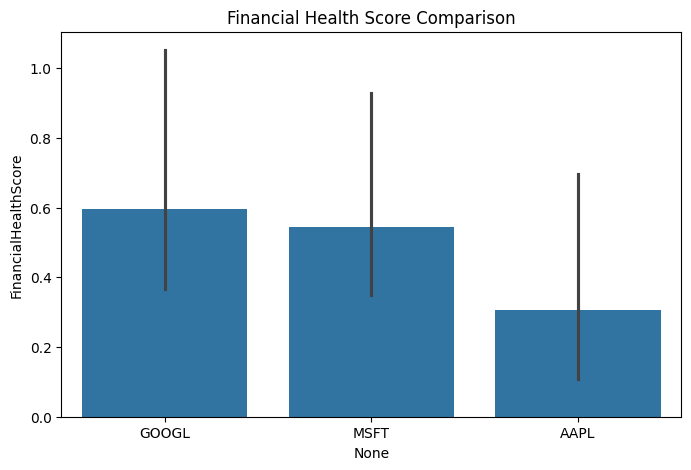

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=ranking.index, y=ranking['FinancialHealthScore'])
plt.title('Financial Health Score Comparison')
plt.show()
